## Приоритизация и тестирование гипотез для увеличения выручки крупного интернет-магазина

Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
В нашем распоряжении есть данные о гипотезах, заказах и о поситителях.

**Цель исследования:** Увеличить выручку крупного интернета-магазина. Провести анализ A/B теста. 

**Ход исследования:**
- Шаг 1 - Приоритизация гипотез
- Шаг 2 - Анализ A/B-теста

В ходе эскперимента для анализа гипотез мы восползуемся следующими метриками: 
- ICE — это метод приоритизации гипотез, который помогает определить, какие гипотезы стоит проверить в первую очередь.
- RICE — это метод приоритизации гипотез, который помогает определить, какие из них наиболее важны и заслуживают внимания.

Для анализа A/B теста такие параметры как: 

- Кумулятивную выручку по группам
- Кумулятивный средний чек по группам
- Относительного изменение кумулятивного среднего чека группы B к группе A
- Кумулятивное среднее количество заказов на посетителя по группам
- Относительное изменение кумулятивное среднего количества заказов на посетителя группы B к группе A
- Количества заказов по пользователя
- Посчитаем 95-й и 99-й перцентили количества заказов на пользователя для определения аномальных пользователей
- Посчитайем 95-й и 99-й перцентили стоимости заказов для определения аномальных пользователей
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» и "отфильтрованным" данным.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» и "отфильтрованным" данным

## Загрузим данные и подготовим их к анализу

In [1]:
import pandas as pd
import datetime as dt
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv',sep=',')
    orders = pd.read_csv('/datasets/orders.csv',sep=',')
    visitors = pd.read_csv('/datasets/visitors.csv',sep=',')
except:
    hypothesis = pd.read_csv('/Users/a0000/Documents/Analitic/All_projects/project8_ABtest/datasets/hypothesis.csv',sep=',')
    orders = pd.read_csv('/Users/a0000/Documents/Analitic/All_projects/project8_ABtest/datasets/orders.csv',sep=',')
    visitors = pd.read_csv('/Users/a0000/Documents/Analitic/All_projects/project8_ABtest/datasets/visitors.csv',sep=',')

Выведем таблицы и изучим их

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
orders.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


In [6]:
visitors.head(2)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


Приведем столбцы date к типу данных datetime64[ns]

In [7]:
orders['date'] = pd.to_datetime(orders['date'])

In [8]:
visitors['date'] = pd.to_datetime(visitors['date'])

В таблицe hypothesis названия столбцов приведем к нижнему регистру. 

In [9]:
hypothesis.columns = hypothesis.columns.str.lower().str.replace(' ', '_')

Вывод информации для каждого DataFrame

In [10]:
items = [hypothesis ,orders ,visitors]


for item in items:
    item.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB

<class 'pandas.core.frame.Data

**Промежуточный вывод:** Мы загрузили данные, пропусков не обнаружено, тип данных в столбцах date изменен с object на datetime64[ns], колонки в таблицу hypothesis приведены к нижнему регистру.

## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [11]:
pd.set_option('display.max_colwidth', None)

ICE — это метод приоритизации гипотез, который помогает определить, какие гипотезы стоит проверить в первую очередь. ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)

In [12]:
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'],2)
hypothesis.sort_values(by = 'ICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


**Промежуточный вывод:** Наиболее перспективные гипотезы по ICE: 
- 8 - Запустить акцию, дающую скидку на товар в день рождения	
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
- 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

RICE — это метод приоритизации гипотез, который помогает определить, какие из них наиболее важны и заслуживают внимания.

Фреймворк RICE состоит из четырёх компонент:
- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

In [13]:
hypothesis['RICE'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'],2)
hypothesis.sort_values(by = 'RICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**Промежуточный вывод:** Наиболее перспективные гипотезы по RICE: 
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
- 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Промежуточный вывод:** Приоритизация гипотез при применении RICE вместо ICE изменилась следующим образом: 

В первых четырех лидирующих позициях гипотезы для ICE - 8, 0, 7, 6 и RICE - 7, 2, 0, 6
Они пересекаются между собой в гипотезах 0, 6, 7
Разница результатов зависит от дополнительного параметра `reach` в RICE, который показывает скольких пользователей затронет изменение, которое вы хотите внести, для гипотезы 7 параметр reach = 10, поэтому этот параметр входит в топ-4, а параметр 8 имеет reach = 1, поэтому он не вошел в топ - 4 RICE 


## Часть 2. Анализ A/B-теста

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [14]:
orders.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


In [15]:
visitors.head(2)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders.

In [16]:
datesGroups = orders[['date','group']].drop_duplicates()

Объявим переменную ordersAggregated, содержащую:
- дату;
- группу A/B-теста;
- число уникальных заказов в группе теста по указанную дату включительно;
- число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
- суммарную выручку заказов в группе теста по указанную дату включительно.

In [17]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
        'date':'max',
        'group':'max',
        'transactionId':'nunique',
        'visitorId':'nunique',
        'revenue':'sum'
    }), axis = 1
).sort_values(by=['date','group'])

Объявим переменную visitorsAggregated, содержащую:
- дату;
- группу A/B-теста;
- количество уникальных посетителей в группе теста по указанную дату включительно.

In [18]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
        'date':'max',
        'group':'max',
        'visitors':'sum'
    }), axis = 1
).sort_values(by = ['date','group'])

Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge()

In [19]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date','group'], right_on = ['date','group'])

Присвоим столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [20]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Выведем первые 5 строк 

In [21]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Мы собрали все нуные кумулятивные данные, приступим к построению графиков

Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраните данные о датах, выручке и числе заказов в группах A и B.
Построим графики кумулятивной выручки по дням по группам.

In [22]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue','orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue','orders']]

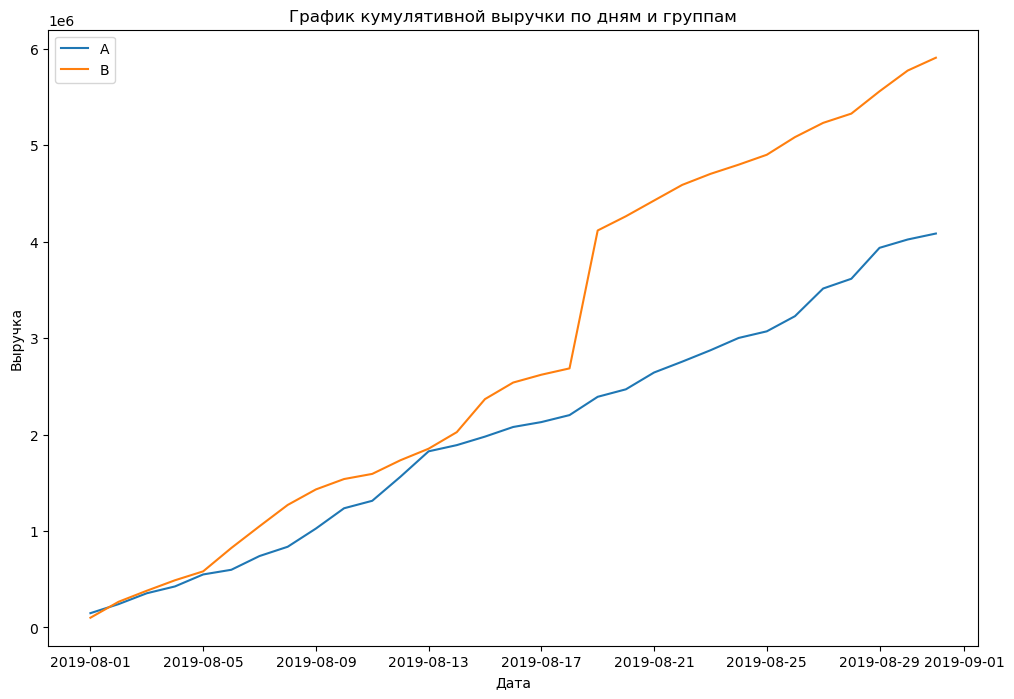

In [23]:
plt.figure(figsize=(12,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по дням и группам')
plt.legend()
plt.show();

**Промежуточный вывод:** Сегмент B начинает лидировать почти с самого начала теста с небольшими колебаниями, но после преодоления середины теста, сегмент B становится сильно выше сегмента A. Похоже, что в сегменте B произошли аномально большие заказы.   

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

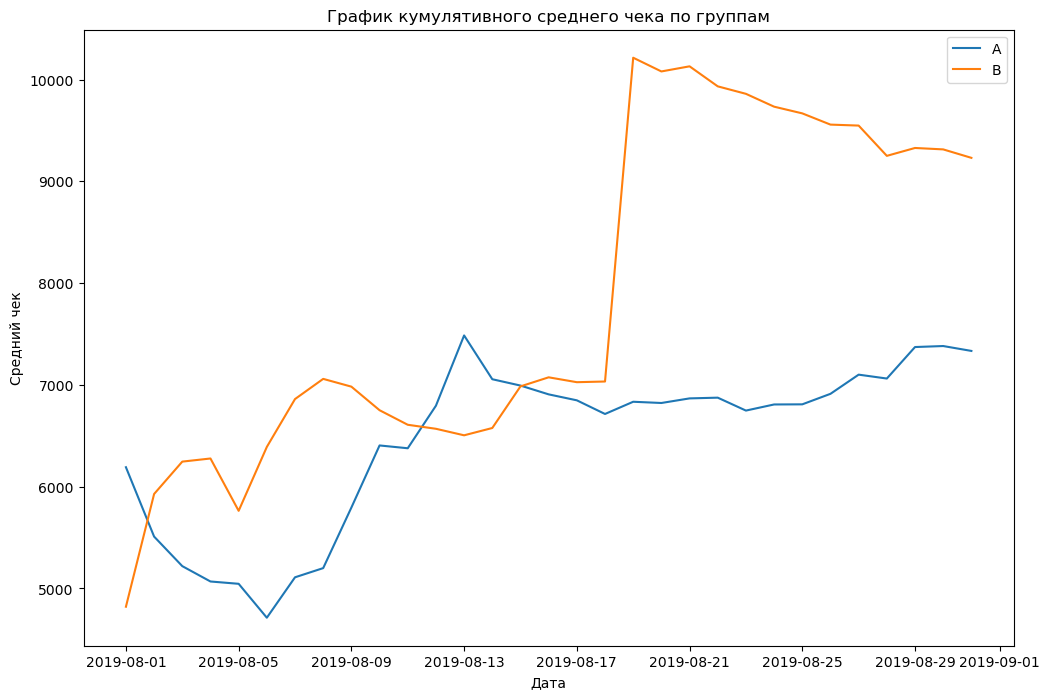

In [24]:
plt.figure(figsize=(12,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label = 'B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.show();

**Промежуточный вывод:** По сегменту A в начале наблюдается снижение, но после рост и фиксирование в среднем на одном уровне с небольшим ростом, в то время как сегмент B показывает рост с колебаниями и после преодоления середины резкий скачок вверх и постпенное снижение без фиксирования на одном уровне.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Объединим таблицы cumulativeRevenueA и cumulativeRevenueB методом merge() так, чтобы она содержала столбцы:

['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB']. 

Сохраним в переменной mergedCumulativeRevenue. 

In [25]:
mergeCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on='date', how = 'left',suffixes=['A','B'])

Построим график относительного изменения кумулятивного среднего чека группы B к группе A

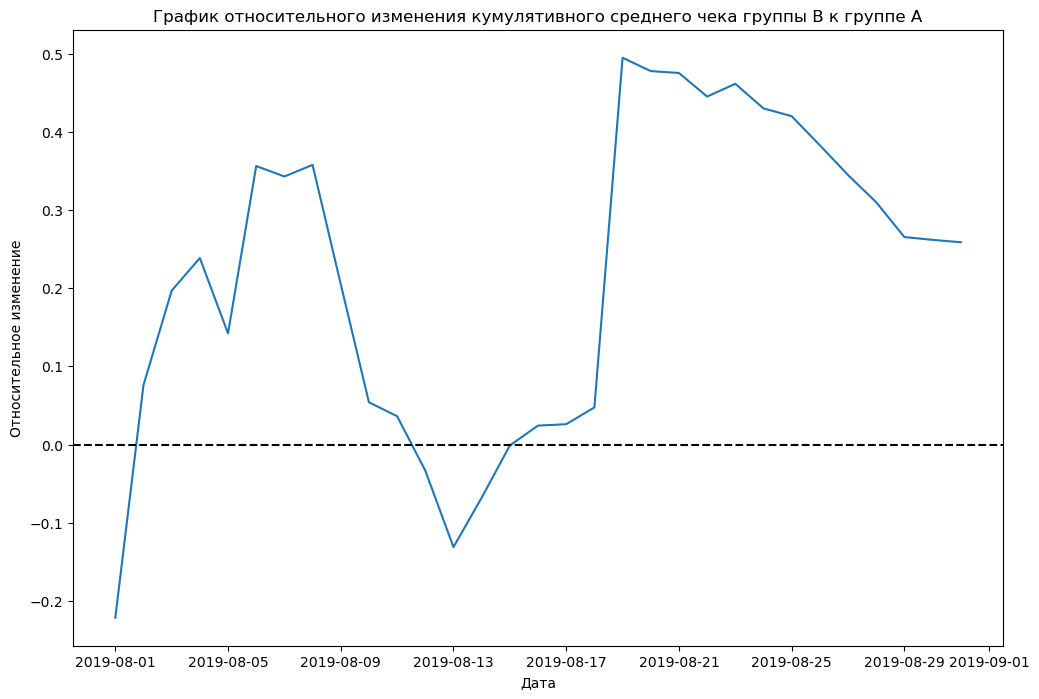

In [26]:
plt.figure(figsize=(12,8))
plt.plot(mergeCumulativeRevenue['date'], (mergeCumulativeRevenue['revenueB'] / mergeCumulativeRevenue['ordersB']) / (mergeCumulativeRevenue['revenueA'] / mergeCumulativeRevenue['ordersA']) - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show();

**Промежуточный вывод:** В нескольких точках график различия между сегментами резко скачет. Скорее всего где-то спрятались крупные заказы и выбросы.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения

Добавим в cumulativeData столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе.

In [27]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

Объявим переменные cumulativeDataA и cumulativeDataB, в которых сохраним данные о заказах в сегментах A и B.

In [28]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Построим график кумулятивного среднего количества заказов на посетителя по группам.

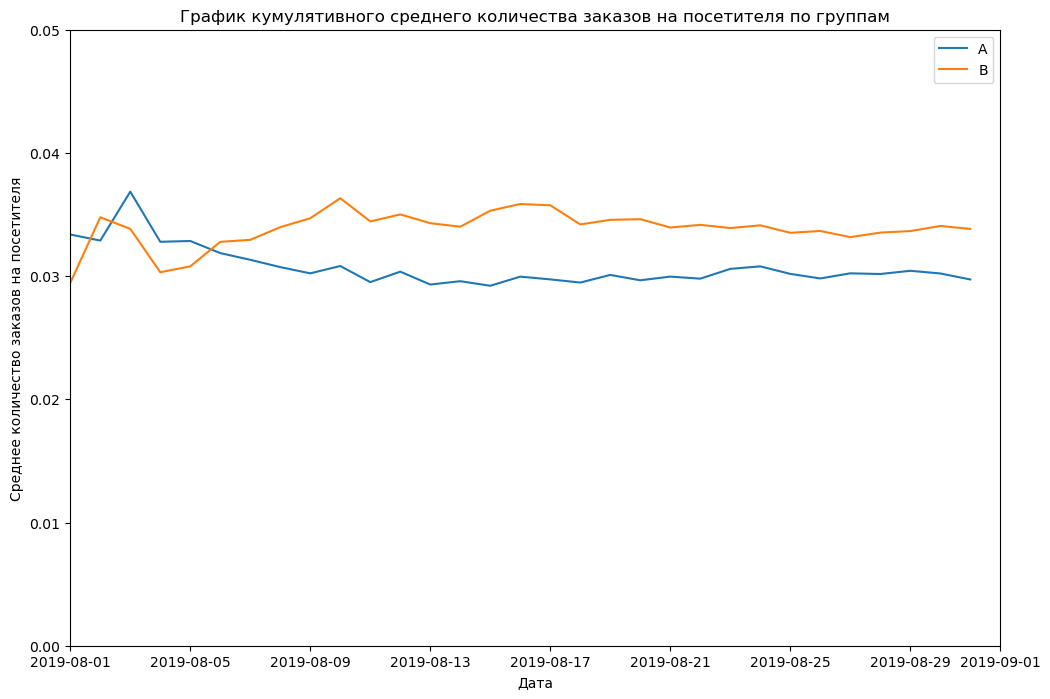

In [29]:
plt.figure(figsize=(12,8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.legend()
plt.show();

**Промежуточный вывод:** В начале теста сегмент A имел большее кумулятивное среднее количество заказов на посетителя, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения больше сегмента A.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

Объединим таблицы cumulativeDataA и cumulativeDataB методом merge() так, чтобы она содержала столбцы: ['date', 'conversionA', 'conversionB']. Сохраним в переменной mergedCumulativeConversions. 

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on = 'date', right_on = 'date', how='left',suffixes=['A','B'])

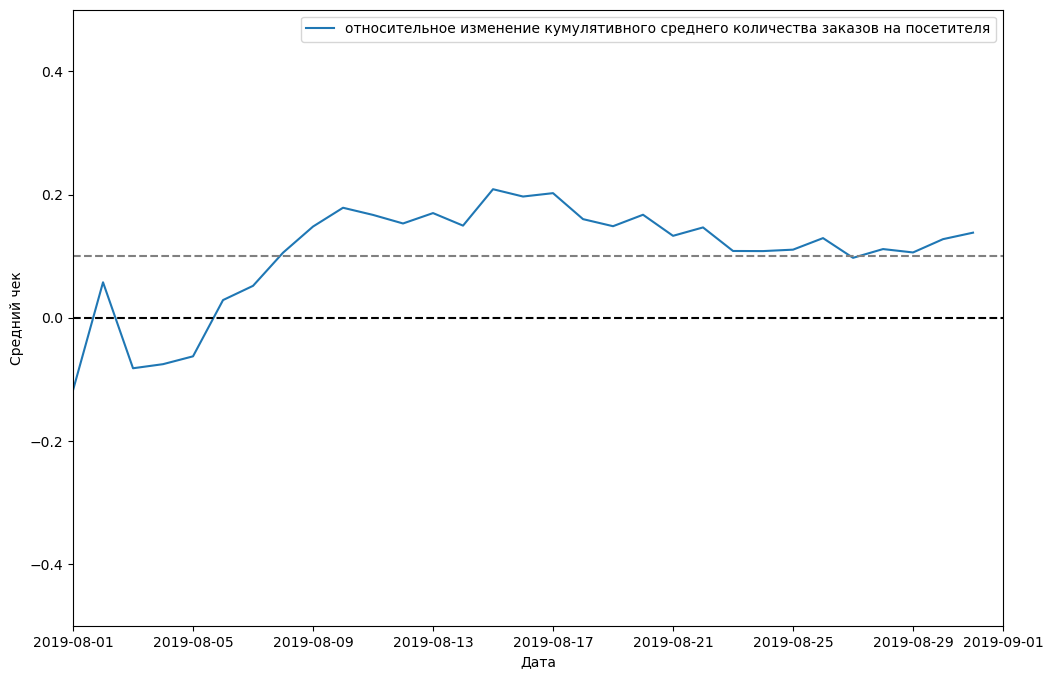

In [31]:
plt.figure(figsize=(12,8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA']-1, label = 'относительное изменение кумулятивного среднего количества заказов на посетителя')

plt.axhline(y = 0, color='black', linestyle='--')
plt.axhline(y = 0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5])

plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show();

**Промежуточный вывод:** Почти с самого начала теста группа B  лидирует по метрике: становиться лучше и лучше, касается рубежа прироста в 20% и позже фиксируется на приросте около 10% отсносительно группы A.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Найдем число заказов по пользователям — создадим датафрейм c двумя столбцами: 'userId' и 'orders'. Назовем его ordersByUsers. Отсортируем по убыванию количества заказов пользователей и выведите на экран первые 10 строк.

In [32]:
ordersByUsers = (
    orders.groupby('visitorId', as_index = False)
    .agg({'transactionId':'nunique'})
)

In [33]:
ordersByUsers.columns= ['userId','orders']

In [34]:
ordersByUsers.sort_values(by='orders',ascending = False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


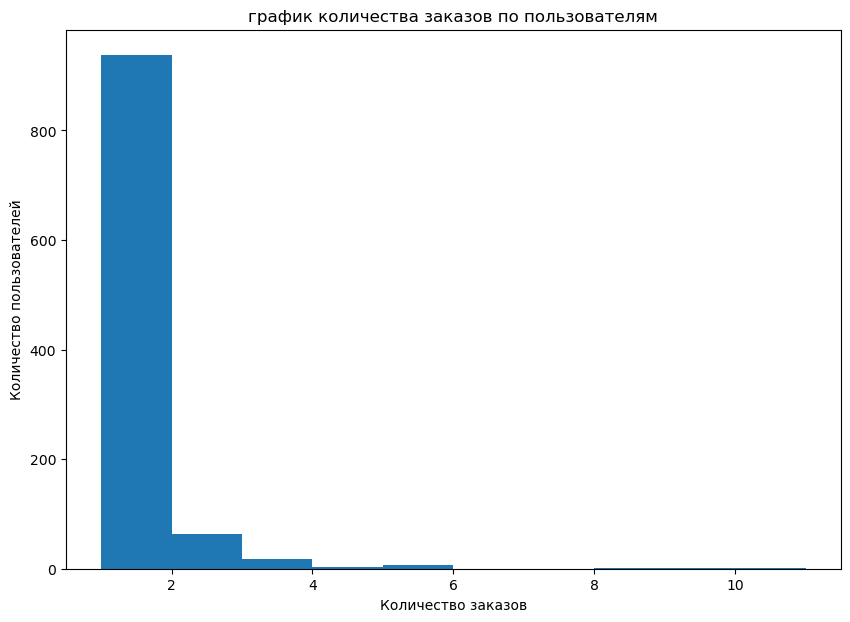

In [35]:
plt.figure(figsize=(10,7))
plt.hist(ordersByUsers['orders'])
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.title('график количества заказов по пользователям');


**Промежуточный вывод:** Большинство пользователей совершило всего 1 заказ

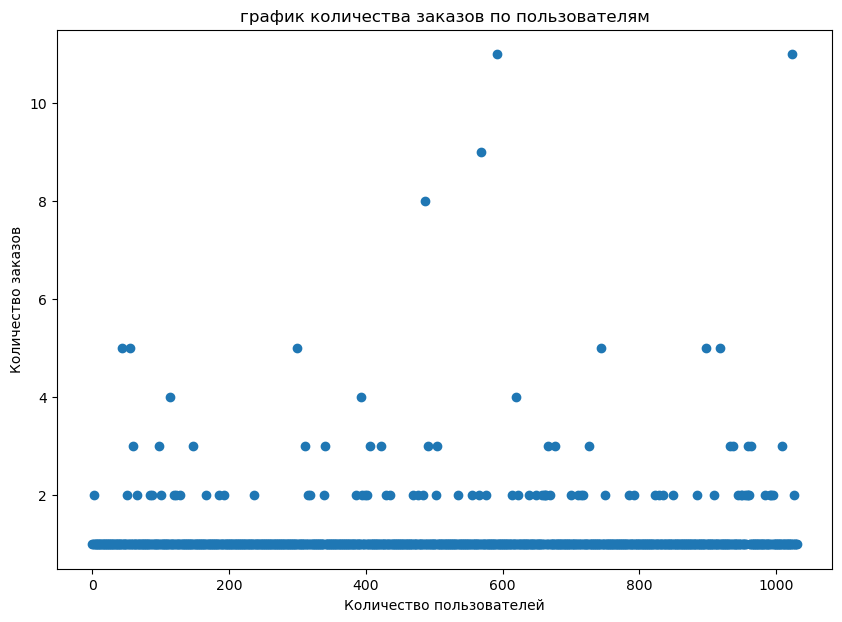

In [36]:
plt.figure(figsize=(10,7))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.title('график количества заказов по пользователям');

**Промежуточный вывод:** Пользователей, заказавших более двух раз совсем мало, они могут быть аномальными.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [37]:
print(np.percentile(ordersByUsers['orders'],[95,99]))

[2. 4.]


**Промежуточный вывод:** Не более 5% пользователей совершили больше 2 заказов и не более 1% пользователей совершили больше 4 заказов.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

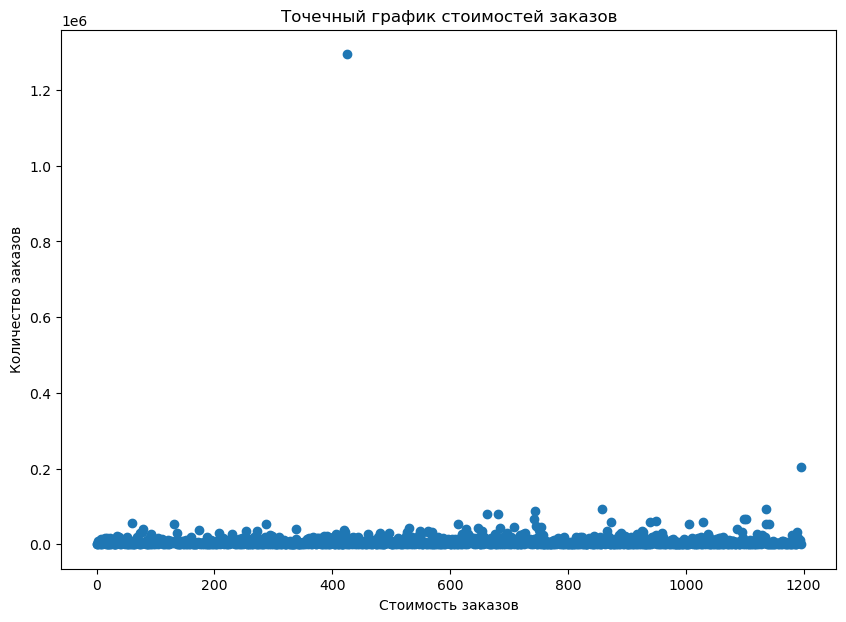

In [38]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10,7))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество заказов')
plt.title('Точечный график стоимостей заказов');

**Промежуточный вывод:** Заказов стоимостью больше 70000 немного. Заказ на 1200000 выглядит весьма аномальным

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [39]:
print(np.percentile(orders['revenue'],[95, 99]))

[28000.  58233.2]


**Промежуточный вывод:** Не более чем у 5% заказов чек дороже 28000 и не больше чем у 1% заказов чек дороже 58233.2

За порог мы возьмем сумму в 30.000 и по ней будем отсекать аномалии

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. 
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем между группами есть.

Начнём с подготовки данных. 

In [40]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]

visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'], где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 

In [41]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index = False)
    .agg({'transactionId':pd.Series.nunique})
)
ordersByUsersA.columns = ['userId','orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index = False)
    .agg({'transactionId':pd.Series.nunique})
)
ordersByUsersB.columns = ['userId','orders']

Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули

In [42]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Посчитаем статистическую значимость различия среднего количества заказов по результатам теста. Применим тест Манна-Уитни. 

In [43]:
print(f'p_value равен {"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])}')
print(f'Относительный прирост среднего группы B к конверсии группы A равен {"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)}')

p_value равен 0.01679
Относительный прирост среднего группы B к конверсии группы A равен 0.138


**Промежуточный вывод:** p_value меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 13.8%.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [44]:
print(f'p_value равен')
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print(f'Относительное различие среднего чека между сегментами равно')
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p_value равен
0.729
Относительное различие среднего чека между сегментами равно
0.259


**Промежуточный вывод:** P_value больше 0.05 - статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами 25,9%

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Приступаем к подготовке очищенных от аномалий данных. 
Приступаем к подготовке очищенных от аномалий данных.
Напомним, что 95-й и 99-й перцентили средних чеков равны 28.000 и 58233,2 рублям. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя. 

Примем за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 30.000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 30.000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию. 

In [45]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)

In [46]:
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']

In [47]:
abnormalUsers = (
    pd.concat([usersWithManyOrders,usersWithExpensiveOrders], axis = 0)
    .drop_duplicates()
    .sort_values()
)

In [48]:
abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64

Мы получили множество аномальных пользователей, после их удаления мы сможем посчитать статистическую значимость очищенных данных.

Создайте переменные sampleAFiltered и sampleBFiltered, в которых сохраните очищенные данные о заказах — не включая аномальных пользователей. 

In [49]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [50]:
print(f'p_value равен')
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print(f'Относительный прирост среднего группы B к конверсии группы A равен')
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p_value равен
0.01832
Относительный прирост среднего группы B к конверсии группы A равен
0.148


**Промежуточный вывод:** Как и в случае c сырыми данными, p_value меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 14.8%. Сегемент B значительно лучше сегмента A.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [51]:
orders_cleaned = orders[~orders['visitorId'].isin(abnormalUsers)]

group_a = orders_cleaned[orders_cleaned['group'] == 'A']['revenue']
group_b = orders_cleaned[orders_cleaned['group'] == 'B']['revenue']

mean_a = group_a.mean()
mean_b = group_b.mean()

stat, p_value = stats.mannwhitneyu(group_a, group_b)

p_value_rounded = round(p_value, 3)

relative_growth = (mean_b - mean_a) / mean_a

relative_growth_rounded = round(relative_growth, 3)


print(f'p_value = {p_value_rounded}')
print(f'Относительное различие среднего чека между сегментами =  {relative_growth_rounded}')


p_value = 0.958
Относительное различие среднего чека между сегментами =  -0.02


**Промежуточный вывод:** 
Статистическая значимость (p-value):

До очистки данных: p-value равен 0.729, что значительно выше стандартного порога значимости 0.05. Это означает, что различия между средними чеками групп A и B не являются статистически значимыми.
После очистки данных: p-value равен 0.958, что еще выше и также значительно превышает порог значимости 0.05. Это подтверждает, что различия между средними чеками групп A и B остаются незначимыми.
Относительное различие среднего чека:

До очистки данных: Относительное различие среднего чека между сегментами равно 0.259, что указывает на увеличение среднего чека в группе B на 25.9% по сравнению с группой A.
После очистки данных: Относительное различие среднего чека между сегментами равно -0.02, что указывает на небольшое снижение среднего чека в группе B на 2% по сравнению с группой A.

### Количество групп в АВ-тесте

### Даты начала и окончания теста

In [52]:
print(ordersADaily['date'].min())
print(ordersADaily['date'].max())
print(ordersBDaily['date'].max()-ordersBDaily['date'].min())

2019-08-01 00:00:00
2019-08-31 00:00:00
30 days 00:00:00


**Промежуточный вывод:** Дата начала теста : 2019-08-01, дата окончания теста : 2019-08-31. Тест длился 30 дней.

### Количество пользователей в каждой группе - по таблице с заказами

In [53]:
ordersByUsersA['userId'].nunique()

503

In [54]:
ordersByUsersB['userId'].nunique()

586

**Промежуточный вывод:** В группе A - 503 пользователя, в группе B - 586 пользователей 

### Вероятность попадания пользователей в обе группы - по таблице с заказами.


In [55]:
users_in_group_a = orders[orders['group'] == 'A']['visitorId'].nunique()
users_in_group_b = orders[orders['group'] == 'B']['visitorId'].nunique()

# Общее количество уникальных пользователей
total_unique_users = orders['visitorId'].nunique()

# Вероятность попадания пользователей в группу A
probability_in_group_a = users_in_group_a / total_unique_users * 100

# Вероятность попадания пользователей в группу B
probability_in_group_b = users_in_group_b / total_unique_users * 100

# Вывод результатов
print(f"Количество уникальных пользователей в группе A: {users_in_group_a}")
print(f"Количество уникальных пользователей в группе B: {users_in_group_b}")
print(f"Общее количество уникальных пользователей: {total_unique_users}")
print(f"Вероятность попадания пользователей в группу A: {probability_in_group_a:.2f}%")
print(f"Вероятность попадания пользователей в группу B: {probability_in_group_b:.2f}%")

Количество уникальных пользователей в группе A: 503
Количество уникальных пользователей в группе B: 586
Общее количество уникальных пользователей: 1031
Вероятность попадания пользователей в группу A: 48.79%
Вероятность попадания пользователей в группу B: 56.84%


**Промежуточный вывод:**
- Вероятность попадания пользователей в группу A: 48.79%
- Вероятность попадания пользователей в группу B: 56.84%

## Общий вывод: 

## Выводы из приоритизации гипотез:

В первых четырех лидирующих позициях гипотезы для ICE - 8, 0, 7, 6 и RICE - 7, 2, 0, 6 Они пересекаются между собой в гипотезах 0, 6, 7 Разница результатов зависит от дополнительного параметра reach в RICE, который показывает скольких пользователей затронет изменение, которое вы хотите внести, для гипотезы 7 параметр reach = 10, поэтому этот параметр входит в топ-4, а параметр 8 имеет reach = 1, поэтому он не вошел в топ - 4 RICE, в итоге самые подходящие гипотезы находятся на местах 0, 6, 7.

## Выводы из A/B - теста:

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.

- По сырым данным нет статистически значимого различия по среднему чеку между группами. Однако после удаления аномалий статистически значимое различие есть.

- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

Поэтому можно принять решение остановить тест и признать его успешным.